In [1]:
import math as m
import os
import pathlib as p
import random as r

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
HOME_PATH = p.Path(os.getcwd())
DATA_PATH = HOME_PATH.joinpath('data')

## _Dataset_

O _Dataset_ utilizado é o ___Breast Cancer Wisconsin (Diagnostic) Data Set___, com informações de imagens digitalizadas de tumores em seios.

As _features_ presentes no conjunto de dados são as medidas e descrições dessas massas, levando a identificação sobre o tumor ser benigno ou maligno.

O _dataset_ pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

In [3]:
data_file_path = DATA_PATH.joinpath('data.csv')

data = pd.read_csv(data_file_path)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Remapeia os labels de classificação
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Separa os casos negativos e positivos
negative = data[data['diagnosis'] == 0]
positive = data[data['diagnosis'] == 1]

## _Sample_ e _Sampling_

Nesta seção, será realizada a etapa __A__ do trabalho.

A _feature_ ___radius_mean___ será utilizada para isso, a qual representa o raio médio de tumores.

In [7]:
# Calcula média e desvio padrão dos dados originais
original_population = data['radius_mean']
original_population_mean = original_population.mean()
original_population_std = original_population.std()

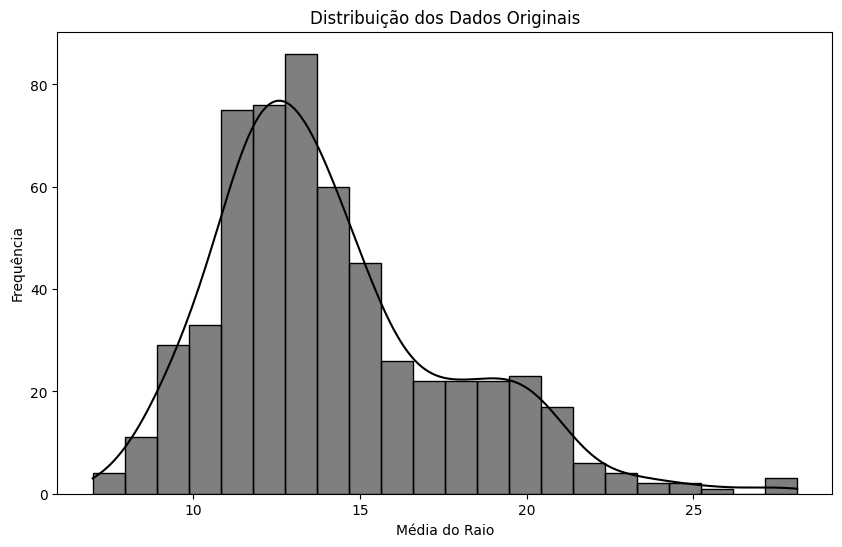

In [8]:
# Apresentação da distribuição dos dados originais
plt.figure(figsize=(10, 6))
sns.histplot(original_population, kde=True, color='black')
plt.title('Distribuição dos Dados Originais')
plt.xlabel('Média do Raio')
plt.ylabel('Frequência')
plt.show()

In [9]:
# Criação de uma população artificial
artificial_population_size = 1000
artificial_population = np.random.normal(original_population_mean, original_population_std, artificial_population_size)

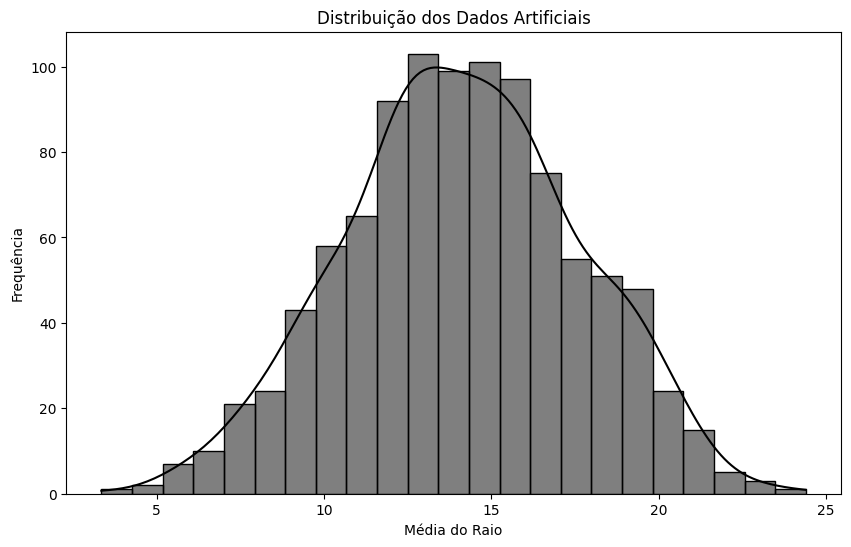

In [10]:
# Apresentação da distribuição dos dados originais
plt.figure(figsize=(10, 6))
sns.histplot(artificial_population, kde=True, color='black')
plt.title('Distribuição dos Dados Artificiais')
plt.xlabel('Média do Raio')
plt.ylabel('Frequência')
plt.show()

In [11]:
# Cria amostra aleatória com 10% da quantidade total de registros nos dados originais
artificial_sample_size = int(artificial_population_size * 0.1)
sample = np.random.choice(artificial_population, size=artificial_sample_size, replace=False)
print(artificial_sample_size)

100


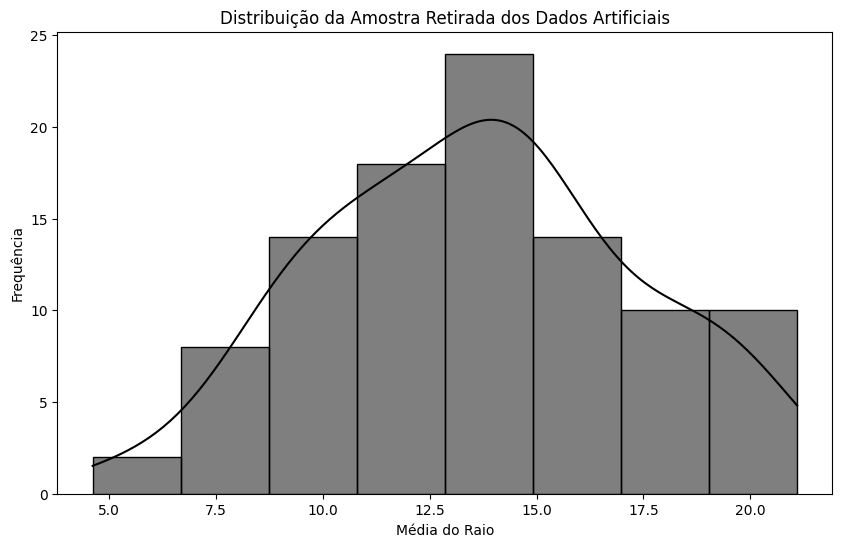

In [12]:
# Apresentação da distribuição dos dados originais
plt.figure(figsize=(10, 6))
sns.histplot(sample, kde=True, color='black')
plt.title('Distribuição da Amostra Retirada dos Dados Artificiais')
plt.xlabel('Média do Raio')
plt.ylabel('Frequência')
plt.show()